In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from tensorflow.keras.layers import Flatten, Dense, Input,concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob as gb
from scipy import spatial

In [4]:
vgg16 = keras.applications.VGG16(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))
for layer in vgg16.layers:
    layer.trainable=False
    

553476096/553467096 [==============================] - 272s 0us/step


In [5]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
basemodel = Model(inputs=vgg16.input, outputs=vgg16.get_layer('fc2').output)

In [7]:
basemodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
#checking numbers of images at each path and classes names
Dataset_path='Data/train/'
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(Dataset_path ) : 
    files = gb.glob(pathname= str( Dataset_path  + folder + '/*.png'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

                                        Folder_name  Traning Image Numbers
0        adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib                    195
1     large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa                    115
2                                            normal                    136
3  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa                    155


In [9]:
Folder_name

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [10]:
def get_feature_vector(img):
    #img=cv2.imread(img)
    image = cv2.resize(img, (224, 224))
    image=image.reshape(1, 224, 224, 3) #convert it to batch
    feature_vector = basemodel.predict(image)
    return feature_vector

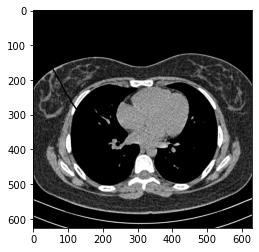

In [14]:
img=cv2.imread('Data/train/normal/imm.png')
plt.imshow(img)
plt.show()

In [15]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
get_feature_vector(img)

array([[0.        , 0.        , 0.        , ..., 3.054941  , 0.        ,
        0.45114666]], dtype=float32)

In [17]:
get_feature_vector(img).shape

(1, 4096)

In [18]:
os.listdir(Dataset_path )

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [19]:
IMG_SIZE=224  
image_path=[]
label = []
class_name=[]
Features=[]
for folder in  os.listdir(Dataset_path ) : 
    print(folder)
    files = gb.glob(pathname= str( Dataset_path  + folder + '/*.png'))
    for file in files: 
        image_class = {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1
                       , 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        feature=get_feature_vector(image)
        feature=feature.astype('float32')
        Features.append(feature)
        image_path.append(file)
        label.append(image_class[folder])
        class_name.append(folder)

adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
normal
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [20]:
len(image_path),len(Features),len(label),len(class_name)

(601, 601, 601, 601)

In [21]:
features_data = pd.DataFrame({'image path':image_path,
                              'Features data': Features,
                              'labels': label,
                              'class name': class_name})

In [22]:
features_data.to_csv('features_data.csv')

In [23]:
df=pd.read_csv('features_data.csv')
print(df.shape)

(601, 5)


In [24]:
df.head()

,Unnamed: 0,image path,Features data,labels,class name
0,0,Data/train/adenocarcinoma_left.lower.lobe_T2_N...,[[1.9375614 0. 0.08620656 ... 0. ...,0,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
1,1,Data/train/adenocarcinoma_left.lower.lobe_T2_N...,[[2.2254424 0. 1.7753457 ... 0.11375...,0,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
2,2,Data/train/adenocarcinoma_left.lower.lobe_T2_N...,[[1.7807802 0. 1.9192389 ... 0.6265105 ...,0,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
3,3,Data/train/adenocarcinoma_left.lower.lobe_T2_N...,[[0. 0. 0. ... 0.07570...,0,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
4,4,Data/train/adenocarcinoma_left.lower.lobe_T2_N...,[[0.6203216 0. 1.7942187 ... 2.7571926 ...,0,adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


In [25]:
basemodel2 = Model(inputs=vgg16.input, outputs=vgg16.layers[13].output)
basemodel2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
vgg16.layers[13].output

<KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv3')>

In [27]:
def get_features(img):
    IMAGE = cv2.resize(img, (224, 224))
    feature_vector = basemodel2.predict(IMAGE.reshape(1, 224, 224, 3))
    return feature_vector

In [28]:
activations=get_features(img)

In [29]:
activations.shape

(1, 28, 28, 512)

In [30]:
# Getting Activations of first layer
first_layer_activation = activations[0]

In [31]:
first_layer_activation.shape

(28, 28, 512)

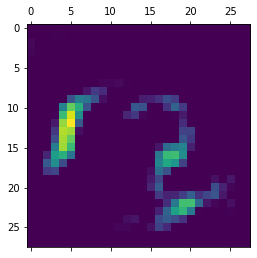

In [32]:
# 6th channel of the image after first layer of convolution is applied
plt.matshow(activations[0, :, :, 6])

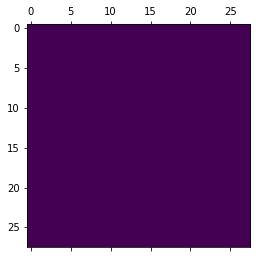

In [33]:
# 6th channel of the image after first layer of convolution is applied
plt.matshow(activations[0, :, :, 500])